In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 6: Clustering
### Associated lectures: Lectures 14 and 15

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html).**

## Imports <a name="im"></a>

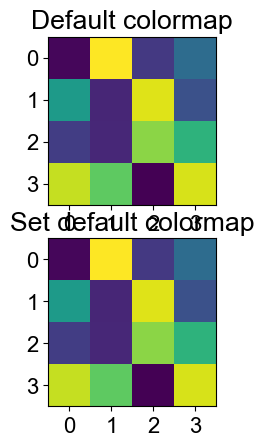

In [2]:
import os
from hashlib import sha1
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.join(os.path.abspath("../../lectures/"), "code"))
from plotting_functions import *
from plotting_functions_unsup import *
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
pd.set_option("display.max_colwidth", 0)

from scipy.cluster.hierarchy import (
    average,
    complete,
    dendrogram,
    fcluster,
    single,
    ward,
)


<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Submission instructions
<hr>
rubric={points}

**Please be aware that this homework assignment requires installation of several packages in your course environment. It's possible that you'll encounter installation challenges, which might be frustrating. However, remember that solving these issues is not wasting time but it is an essential skill for anyone aspiring to work in data science or machine learning.**

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W1/blob/main/docs/homework_instructions.md). 

**You may work in a group on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb. If the pdf or html also fail to render on Gradescope, please create two files for your homework: hw6a.ipynb with Exercise 1 and hw6b.ipynb with Exercises 2 and 3 and submit these two files in your submission.  
</div>

_Points:_ 6

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: Document clustering warm-up
<hr>

In this homework, we will explore a popular application of clustering called [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A, tweets), and clustering is a commonly used technique to organize this data in a meaningful way. 

As a warm up, in this exercise you will cluster sentences from a toy corpus. Later in the homework you will work with a real corpus. 

The code below extracts introductory sentences of Wikipedia articles on a set of queries. To run the code successfully, you will need the `wikipedia` package installed in the course environment. 

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```


**Your tasks:**

Run the code below which 
- extracts content of Wikipedia articles on a set of queries
- tokenizes the text (i.e., separates sentences) and 
- stores the 2nd sentence in each article as a document representing that article

> Feel free to experiment with Wikipedia queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs to grade your submission.

> For tokenization we are using the `nltk` package. If you do not have this package in the course environment, you will have to install it.

```
conda activate cpsc330
conda install -c anaconda nltk
```

Even if you have the package installed via the course `conda` environment, you might have to download `nltk` pre-trained models, which can be done with the code below.

In [3]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/celine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import wikipedia
from nltk.tokenize import sent_tokenize, word_tokenize

queries = [
    "baguette food",
    "banana bread food",
    "bread food",
    "data science",
    "sports analytics",
    "football sport",
    "ice hockey",
]

wiki_dict = {"wiki query": [], "text": [], "n_words": []}
for i in range(len(queries)):
    text = sent_tokenize(wikipedia.page(queries[i]).content)[1]
    wiki_dict["text"].append(text)
    wiki_dict["n_words"].append(len(word_tokenize(text)))
    wiki_dict["wiki query"].append(queries[i])

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,baguette food,It is distinguishable by its length and crisp crust.,10
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20
3,data science,"Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.Data science is a ""concept to unify statistics, data analysis, informatics, and their related methods"" to ""understand and analyze actual phenomena"" with data.",59
4,sports analytics,"Through the collection and analysis of these data, sports analytics inform players, coaches and other staff in order to facilitate decision making both during and prior to sporting events.",32
5,football sport,"Sports can, through casual or organized participation, improve participants' physical health.",15
6,ice hockey,It belongs to a family of sports called hockey.,10


Our toy corpus has six toy documents (`text` column in the dataframe) extracted from Wikipedia queries. 

<br><br>

<!-- BEGIN QUESTION -->

### 1.1 How many clusters? 
rubric={points}


**Your tasks:**

1. If you are asked to cluster the documents from this toy corpus manually, how many clusters would you identify and how would you label each cluster?   

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

**Answer**
Looking at the query and text in the toy corpus, there can be three clusters and I would label them as food, data science and sports.  

In [5]:
# define the # of clusters
k_clusters = 3

_Type your answer here, replacing this text._

In [6]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.2 `KMeans` with bag-of-words representation 
rubric={points}

In the lecture, we saw that data representation plays a crucial role in clustering. Changing flattened representation of images to feature vectors extracted from pre-trained models greatly improved the quality of clustering. 

What kind of representation is suitable for text data? We have used bag-of-words representation to numerically encode text data before, where each document is represented with a vector of word frequencies. 

Let's try clustering documents with this simplistic representation.  

**Your tasks:**

1. Create bag-of-words representation using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) with default arguments for the `text` column in `wiki_df` above.
2. Cluster the encoded documents with [`KMeans` clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Use `random_state=42` (for reproducibility) and set `n_clusters` to the number you identified in the previous exercise.
3. Store the clustering labels in `kmeans_bow_labels` variable below. 

In [7]:
wiki_df.columns

Index(['wiki query', 'text', 'n_words'], dtype='object')

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 4

In [8]:
# 1. create BOW representation for the text coulmn in wiki_df
from sklearn.feature_extraction.text import CountVectorizer
stop_words = ["an", "and", "are", "as", "be", "to", "it", "is", "of", "can", "the", "or", "other", "often", "through", "there", "these", "with", "without", "them", "their", "some", "many"]
vec = CountVectorizer(stop_words=stop_words)
text_transformed = vec.fit_transform(wiki_df['text'])
bow_df = pd.DataFrame(
    text_transformed.toarray(), columns=vec.get_feature_names_out(), index=wiki_df.index
)
bow_df

,actual,analysis,analytics,analyze,around,been,belongs,both,bread,but,...,sports,staff,statistics,sweet,throughout,understand,unify,workflow,world,yeast
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,0,0
4,0,1,1,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
# 2. k-means clustering
from sklearn.cluster import KMeans
kmeans_bow = KMeans(n_clusters=k_clusters, n_init='auto', random_state=42)
kmeans_bow.fit(text_transformed)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [10]:
kmeans_bow_labels  = kmeans_bow.labels_

In [11]:
wiki_df["bow_kmeans"] = kmeans_bow_labels
wiki_df

,wiki query,text,n_words,bow_kmeans
0,baguette food,It is distinguishable by its length and crisp crust.,10,1
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,2
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,0
3,data science,"Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.Data science is a ""concept to unify statistics, data analysis, informatics, and their related methods"" to ""understand and analyze actual phenomena"" with data.",59,1
4,sports analytics,"Through the collection and analysis of these data, sports analytics inform players, coaches and other staff in order to facilitate decision making both during and prior to sporting events.",32,1
5,football sport,"Sports can, through casual or organized participation, improve participants' physical health.",15,1
6,ice hockey,It belongs to a family of sports called hockey.,10,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 Sentence embedding representation
rubric={points}

Bag-of-words representation is limited in that it does not take into account word ordering and context. There are other richer and more expressive representations of text which can be extracted using transfer learning. In this lab, we will use one such representation called sentence embedding representation, which uses deep learning models to generate dense, fixed-length vector representations for sentences. We will extract such representations using sentence transformer package. Sentence embedding takes into account context of words and semantic meaning of sentences and it is likely to work better when we are interested in clustering sentences based on their semantic similarity. 

```
conda activate cpsc330
conda install pytorch::pytorch torchvision torchaudio -c pytorch
conda install -c conda-forge sentence-transformers
```

**Your tasks:**

1. Run the code below to create sentence embedding representation of documents in our toy corpus. 
2. Cluster documents in our toy corpus encoded with this representation (`emb_sents`) and `KMeans` with following arguments: 
    - `random_state=42` (for reproducibility)
    - `n_clusters`=the number of clusters you identified in 1.1
3. Store the clustering labels in `kmeans_emb_labels` variable below. 

In [12]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

In [13]:
import torch

In [14]:
torch.__version__

'2.1.0'

In [15]:
emb_sents = embedder.encode(wiki_df["text"])
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.186268,0.286701,0.058713,0.095216,-0.136911,0.091687,-0.029694,-0.104941,0.174888,0.482773,...,0.025578,-0.078821,0.470531,-0.209694,-0.379227,0.409229,-0.299176,0.155534,0.309284,0.124819
1,-0.202058,0.320748,0.190347,0.232200,0.600542,0.376622,-0.018205,-0.027148,-0.076680,0.381884,...,0.213061,-0.080009,0.422756,0.072725,0.016025,-0.014596,-0.202858,-0.162947,-0.190418,-0.002013
2,-0.022417,0.217159,0.022694,0.003616,0.240856,0.358047,-0.053310,-0.328076,0.190012,0.244470,...,0.265412,-0.415595,0.003036,0.052484,0.345947,0.110091,0.405441,0.197792,-0.058253,0.212376
3,0.050543,-0.046997,0.146492,0.104616,0.361515,-0.351800,0.084182,0.141171,0.401255,0.070860,...,0.202365,-0.208398,0.220897,0.254414,0.135893,0.077933,0.121339,-0.331250,0.737436,-0.296757
4,0.361129,-0.165758,0.057518,0.265418,-0.066239,-0.292066,0.071660,-0.042029,0.481624,-0.279851,...,0.620761,-0.306609,0.379003,0.270570,-0.204157,0.143271,0.045386,-0.348121,0.277476,0.084160
5,0.401523,0.294517,0.169535,0.092037,0.159019,0.504919,0.392199,-0.074319,0.314625,0.033591,...,0.362093,-0.135943,0.133037,0.353604,-0.222303,0.077625,-0.082624,0.261559,0.272954,0.113219
6,0.108902,0.087363,0.119847,-0.050133,0.240210,-0.082101,0.190988,0.436203,-0.085558,-0.012788,...,0.145415,0.160032,0.071930,0.147640,0.043789,0.253031,-0.009357,0.415206,0.142142,0.130365


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 3

In [16]:
kmeans_emb = KMeans(n_clusters=k_clusters, random_state=42)
kmeans_emb.fit(emb_sent_df)

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [17]:
kmeans_emb_labels = kmeans_emb.labels_

In [18]:
wiki_df["emb_kmeans"] = kmeans_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans
0,baguette food,It is distinguishable by its length and crisp crust.,10,1,2
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,2,2
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,0,0
3,data science,"Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.Data science is a ""concept to unify statistics, data analysis, informatics, and their related methods"" to ""understand and analyze actual phenomena"" with data.",59,1,1
4,sports analytics,"Through the collection and analysis of these data, sports analytics inform players, coaches and other staff in order to facilitate decision making both during and prior to sporting events.",32,1,1
5,football sport,"Sports can, through casual or organized participation, improve participants' physical health.",15,1,1
6,ice hockey,It belongs to a family of sports called hockey.,10,1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 DBSCAN with cosine distance  
rubric={points}

Now try [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on our toy dataset. K-Means is kind of bound to the Euclidean distance because it is based on the notion of means. With `DBSCAN` we can try different distance metrics. In the context of text data, [cosine similarities](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) or cosine distances tend to work well. Given vectors $u$ and $v$, the **cosine distance** between the vectors is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$


**Your tasks**

1. Cluster documents in our toy corpus encoded with sentence embedding representation (`emb_sents`) and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN) with `metric='cosine'`. You will have to set appropriate values for the hyperparamters `eps` and `min_samples` to get meaningful clusters, as default values of these hyperparameters are unlikely to work well on this toy dataset.
2. Store the clustering labels in the `dbscan_emb_labels` variable below. 

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 4

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
# tuning eps and min_samples
for eps in np.arange(0.7, 0.8, 0.05):
    print("\neps={}".format(eps))
    dbscan = DBSCAN(metric='cosine', eps=eps, min_samples=1)
    labels = dbscan.fit_predict(emb_sents)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=0.7
Number of clusters: 5
Cluster sizes: [0 2 1 2 1 1]

eps=0.75
Number of clusters: 4
Cluster sizes: [0 2 1 3 1]

eps=0.8
Number of clusters: 1
Cluster sizes: [0 7]


By intuition, earlier I identified three clusters with clusters having 3, 2, 2 example individually. Therefore, the min_sample value is set to 1. 
As shown in the results above, when eps =0.75 and min_sample = 1, the dbscan clustering result is the closest to my identified clusters.  

In [21]:
best_eps = 0.75
best_min_samples = 1
dbscan = DBSCAN(metric='cosine', eps=best_eps, min_samples=best_min_samples)

In [22]:
# dbscan.fit(emb_sents)
# dbscan_emb_labels = dbscane.labels_
dbscan_emb_labels = dbscan.fit_predict(emb_sents)


In [23]:
wiki_df["emb_dbscan"] = dbscan_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan
0,baguette food,It is distinguishable by its length and crisp crust.,10,1,2,0
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,2,2,0
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,0,0,1
3,data science,"Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.Data science is a ""concept to unify statistics, data analysis, informatics, and their related methods"" to ""understand and analyze actual phenomena"" with data.",59,1,1,2
4,sports analytics,"Through the collection and analysis of these data, sports analytics inform players, coaches and other staff in order to facilitate decision making both during and prior to sporting events.",32,1,1,2
5,football sport,"Sports can, through casual or organized participation, improve participants' physical health.",15,1,1,2
6,ice hockey,It belongs to a family of sports called hockey.,10,1,1,3


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Hierarchical clustering with sentence embedding representation
rubric={points}

**Your tasks:**

Try hierarchical clustering on `emb_sents`. In particular
1. Create and show a dendrogram with `complete` linkage and `metric='cosine'` on this toy dataset.
2. Create flat clusters using `fcluster` with appropriate hyperparameters and store cluster labels to `hier_emb_labels` variable below.

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

In [24]:
linkage_array = linkage(emb_sents, method='complete', metric='cosine')
hier_emb_labels = fcluster(linkage_array, 3, criterion="maxclust",)
hier_emb_labels

array([1, 1, 3, 2, 2, 3, 3], dtype=int32)

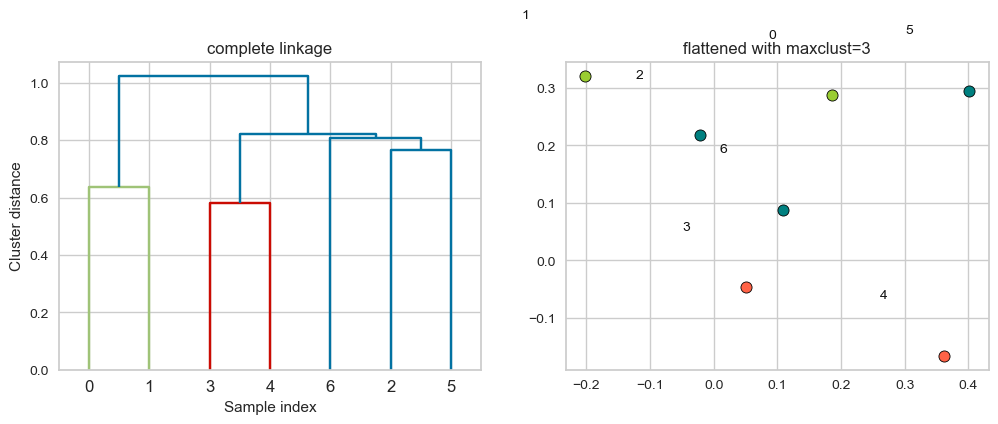

In [25]:
plot_dendrogram_clusters(emb_sents, linkage_array, hier_emb_labels, linkage_type='complete', title="flattened with maxclust=3")

In [26]:
wiki_df["emb_hierarchical"] = hier_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan,emb_hierarchical
0,baguette food,It is distinguishable by its length and crisp crust.,10,1,2,0,1
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,2,2,0,1
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,0,0,1,3
3,data science,"Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.Data science is a ""concept to unify statistics, data analysis, informatics, and their related methods"" to ""understand and analyze actual phenomena"" with data.",59,1,1,2,2
4,sports analytics,"Through the collection and analysis of these data, sports analytics inform players, coaches and other staff in order to facilitate decision making both during and prior to sporting events.",32,1,1,2,2
5,football sport,"Sports can, through casual or organized participation, improve participants' physical health.",15,1,1,2,3
6,ice hockey,It belongs to a family of sports called hockey.,10,1,1,3,3


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Discussion
rubric={points}

**Your tasks:**

1. Reflect on and discuss the clustering results of the methods you explored in the previous exercises, focusing on the following points:    
    - effect of input representation on clustering results
    - whether the clustering results match with your intuitions and the challenges associated with getting the desired clustering results with each method

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

In [27]:
wiki_df["my_intuition"] = ['0', '0', '0','1', '1', '2', '2']
wiki_df[columns:=['wiki query','bow_kmeans', 'emb_kmeans',
       'emb_dbscan', 'emb_hierarchical', 'my_intuition']]

,wiki query,bow_kmeans,emb_kmeans,emb_dbscan,emb_hierarchical,my_intuition
0,baguette food,1,2,0,1,0
1,banana bread food,2,2,0,1,0
2,bread food,0,0,1,3,0
3,data science,1,1,2,2,1
4,sports analytics,1,1,2,2,1
5,football sport,1,1,2,3,2
6,ice hockey,1,1,3,3,2



Bag-of-words representation is limited in that it does not take into account word ordering and context. There are other richer and more expressive representations of text which can be extracted using transfer learning. In this lab, we will use one such representation called sentence embedding representation, which uses deep learning models to generate dense, fixed-length vector representations for sentences. We will extract such representations using sentence transformer package. Sentence embedding takes into account context of words and semantic meaning of sentences and it is likely to work better when we are interested in clustering sentences based on their semantic similarity. 

**Effect of input representation on clustering results**

Comparing the clustering results in bow_keamns and emb_kmeans, we can conclude that input representation has different clustering results, although using the same k-means clustering algorithm. 

Specifically, sentence embedding representation produced a more reasonable result with the first two data examples grouped together, which aligns with my_intuition. Sentence embedding representation performs better largely because it takes into account the context of words and semantics, which are neglected in bag of words representation. 

**Compare the results with my intuition**

- Among all the clustering results, emb_hierarchical produced the clustering result identical to my intuitions, however, there is still one example (the 3rd example with the 'bread food' query) clustered differently from my tuition.

- The emb_dbscan has 5 examples clustered matching my intuition. The performance of bow_kmeans and emb_kmeans are much worse, with only 3/7 and 4/7 results aligning with my intuition.

**Challenges associated with getting the desired clustering results with each method**
- k-means: can't identify outliers; the decision boundary is linear, so in this problem, it fails to identify clusters with complex shapes.
- dbscan: default hyper-parameter produces poor result, need to adjust two hyperparameters eps and min_samples to get a more desired result. Also dbscan performs poorly when clusters in a data set have different densities.
- hierarchical clustering: the challenges lie in determining the linkage criteria to find similarity between clusters. It may be hard to pick the best linkage criteria on the first try because the linkage concepts can be abstract when dealing with data with contextual and semantic meanings. In the problem I was lucky to get a relatively satisfying result with compete linkage, and the toy corpus is very small so I didn't have to apply truncation.


<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

### 1.7 Visualizing clusters
rubric={points}


One approach to working with unlabeled data is visualization. That said, our data is high-dimensional, making it challenging to visualize. Take sentence embedding representation as an example: each instance is depicted in 768 dimensions. To visualize such high-dimensional data, we can employ dimensionality reduction techniques to extract the most significant 2 or 3 components, and then visualize this low-dimensional data.

Given data as a `numpy` array and corresponding cluster assignments, the `plot_umap_clusters` function below transforms the data by applying dimensionality reduction technique called [UMAP](https://umap-learn.readthedocs.io/en/latest/) to it and plots the transformed data with different colours for different clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the UMAP part.* 

You'll have to install the `umap-learn` package in the course conda environment either with `conda` or `pip`, as described in the [documentation](https://umap-learn.readthedocs.io/en/latest/index.html). 

```
> conda activate cpsc330
> conda install -c conda-forge umap-learn
```
or

```
> conda activate cpsc330
> pip install umap-learn 
```

If you get an error with the import below try

```
pip install --upgrade numba umap-learn
```

**Your tasks:**

1. Visualize the clusters created by the methods above using `plot_umap_clusters` function below. In other words, visualize clusters identified by each of the methods below. 
    - K-Means with bag-of-words representation 
    - K-Means with sentence embedding representation
    - DBSCAN with sentence embedding representation 
    - Flat cluster of hierarchical clustering with sentence embedding representation     

In [28]:
import umap

In [29]:
import umap

def plot_umap_clusters(
    data,
    cluster_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=50,
    n_neighbors=15,
    title="UMAP visualization",
    ignore_noise=False,
):
    """
    Carry out dimensionality reduction using UMAP and plot 2-dimensional clusters.

    Parameters
    -----------
    data : numpy array
        data as a numpy array
    cluster_labels : list
        cluster labels for each row in the dataset
    raw_sents : list
        the original raw sentences for labeling datapoints
    show_labels : boolean
        whether you want to show labels for points or not (default: False)
    size : int
        size of points in the scatterplot
    n_neighbors : int
        n_neighbors hyperparameter of UMAP. See the documentation.
    title : str
        title for the visualization plot

    Returns
    -----------
    None. Shows the clusters.
    """

    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    Z = reducer.fit_transform(data)  # reduce dimensionality
    umap_df = pd.DataFrame(data=Z, columns=["dim1", "dim2"])
    umap_df["cluster"] = cluster_labels

    if ignore_noise:
        umap_df = umap_df[umap_df["cluster"] != -1]

    labels = np.unique(umap_df["cluster"])

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title(title)

    scatter = ax.scatter(
        umap_df["dim1"],
        umap_df["dim2"],
        c=umap_df["cluster"],
        cmap="tab20b",
        s=size,
        #edgecolors="k",
        #linewidths=0.1,
    )

    legend = ax.legend(*scatter.legend_elements(), loc="best", title="Clusters")
    ax.add_artist(legend)

    if show_labels:
        x = umap_df["dim1"].tolist()
        y = umap_df["dim2"].tolist()
        for i, txt in enumerate(raw_sents):
            ax.annotate(" ".join(txt.split()[:10]), (x[i], y[i]))
    plt.show()

<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 4

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:2433: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



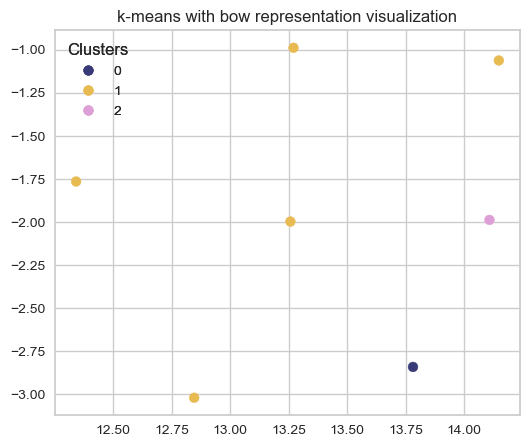

In [30]:
# plot k-means with bow representation
kmeans_bow_plot = plot_umap_clusters(
    text_transformed,
    kmeans_bow_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=50,
    n_neighbors=15,
    title="k-means with bow representation visualization",
    ignore_noise=False,
)

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:2433: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



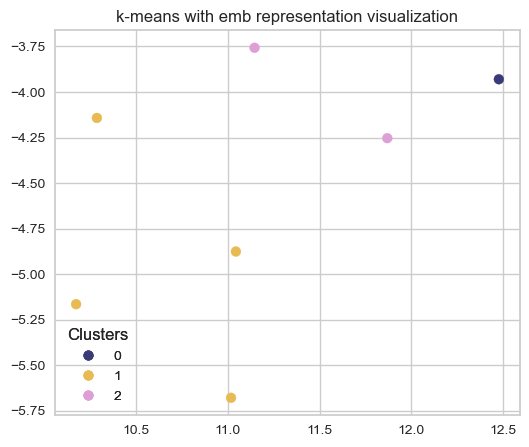

In [31]:
# plot k-means with emb representation
kmeans_emb_plot = plot_umap_clusters(
    emb_sents,
    kmeans_emb_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=50,
    n_neighbors=15,
    title="k-means with emb representation visualization",
    ignore_noise=False,
)

<!-- END QUESTION -->

<br><br><br><br>

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:2433: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



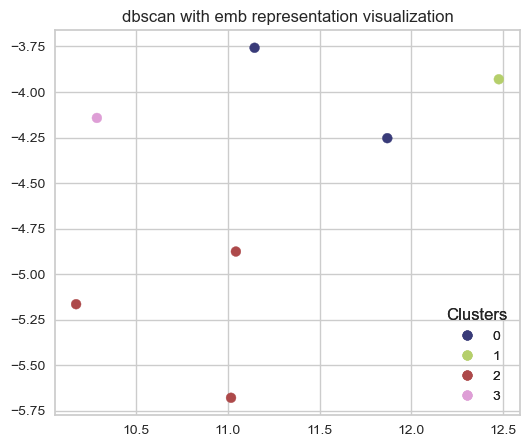

In [32]:
# plot k-means with bow representation
dbscan_emb_plot = plot_umap_clusters(
    emb_sents,
    dbscan_emb_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=50,
    n_neighbors=15,
    title="dbscan with emb representation visualization",
    ignore_noise=False,
)

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:2433: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



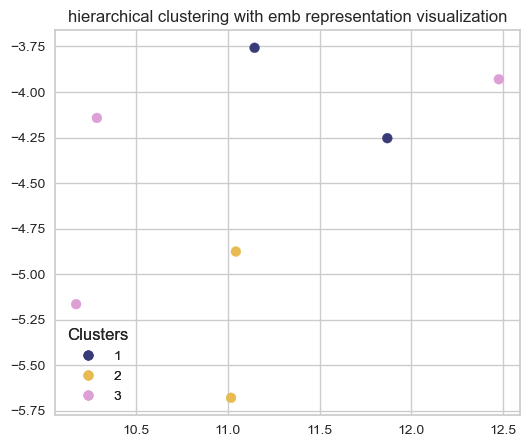

In [33]:
# plot hierarchical clustering with sentence embedding 
kmeans_bow_plot = plot_umap_clusters(
    emb_sents,
    hier_emb_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=50,
    n_neighbors=15,
    title="hierarchical clustering with emb representation visualization",
    ignore_noise=False,
)

## Exercise 2: [Food.com](https://www.food.com/) recipes 
<hr>

Now that we have applied document clustering on a toy corpus, let's move to a more realistic corpus. 

In the lecture, we worked on an activity of manually clustering food items and discussed challenges associated with it. We also applied different clustering algorithms to cluster food images. We'll continue this theme of clustering food items in this lab. But instead of images we will cluster textual description of food items, i.e., recipe names.   

In this lab, we will work with a sample of [Kaggle's Food.com recipes corpus](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions). This corpus contains 180K+ recipes and 700K+ recipe reviews. In this lab, we'll only focus on recipes and **not** on reviews. The recipes are present in `RAW_recipes.csv`. Our goal is to find categories or groupings of recipes from this corpus based on their names. 

**Your tasks:**

- Download [`RAW_recipes.csv`](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and put it under the `data` directory in the homework folder. 
- Run the code below. The dataset is quite large, and in this assignment, for speed, you will work with a sample of the dataset. The function `get_recipes_sample` below carries out some preliminary preprocessing and returns a sample of the recipes with most frequent tags. 

> *Note: Depending upon the capacity of your computer, feel free to increase or decrease the size of this sample by changing the value for `n_tags`. If you decide to go with a different value of `n_tags`, state it clearly in Exercise 2.1 so that the grader knows about it.* 

In [34]:
orig_recipes_df = pd.read_csv("data/RAW_recipes.csv")
orig_recipes_df.shape

(231637, 12)

In [35]:
def get_recipes_sample(orig_recipes_df, n_tags=300, min_len=5):
    orig_recipes_df = orig_recipes_df.dropna()  # Remove rows with NaNs.
    orig_recipes_df = orig_recipes_df.drop_duplicates(
        "name"
    )  # Remove rows with duplicate names.
    # Remove rows where recipe names are too short (< 5 characters).
    orig_recipes_df = orig_recipes_df[orig_recipes_df["name"].apply(len) >= min_len]
    # Only consider the rows where tags are one of the most frequent n tags.
    first_n = orig_recipes_df["tags"].value_counts()[0:n_tags].index.tolist()
    recipes_df = orig_recipes_df[orig_recipes_df["tags"].isin(first_n)]
    return recipes_df

In [36]:
recipes_df = get_recipes_sample(orig_recipes_df)
recipes_df.shape

(9100, 12)

In [37]:
recipes_df["name"]

42        i yam what i yam  muffins    
101       to your health  muffins      
129       250 00 chocolate chip cookies
138       lplermagronen                
163       california roll   salad      
                   ...                 
231430    zucchini wheat germ cookies  
231514    zucchini blueberry bread     
231547    zucchini salsa burgers       
231596    zuppa toscana                
231629    zydeco salad                 
Name: name, Length: 9100, dtype: object

<br><br>

**In the rest of the homework, we will use `recipes_df` above, which is a subset of the original dataset.** 

<br><br>

<!-- BEGIN QUESTION -->

### 2.1 Longest and shorted recipe names 
rubric={points}

**Your tasks:**

1. Print the shortest and longest recipe names (length in terms of number of characters) from `recipes_df`. If there is more than one recipe with the same shortest/longest length, store **one** of them in `shortest_recipe` and/or `longest_recipe` as a **string**.

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [38]:
shortest_recipe = recipes_df['name'].iloc[0]
longest_recipe = recipes_df['name'].iloc[0]
for name in pd.Series(recipes_df['name']):
    if len(name) > len(longest_recipe):
        longest_recipe = name
    if len(name) < len(shortest_recipe):
        shortest_recipe = name
print("the longest recipe name: ", longest_recipe)
print("the shortest recipe name: ", shortest_recipe)


the longest recipe name:  baked tomatoes with a parmesan cheese crust and balsamic drizzle
the shortest recipe name:  bread


In [39]:
recipes_df['name'].sort_values(ascending=True)

735       007 cocktail                                    
784       1 2 3 4 cake  orange                            
787       1 bowl fudgy brownies                           
741       1 lb abm hawaiian sweet bread                   
849       10 minute baked halibut with garlic butter sauce
                                ...                       
231410    zucchini tater tots                             
231423    zucchini tots                                   
231430    zucchini wheat germ cookies                     
231596    zuppa toscana                                   
231629    zydeco salad                                    
Name: name, Length: 9100, dtype: object

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.2 More EDA
rubric={points}

**Your tasks:**
1. Create a word cloud for the recipe names. You can use [the `wordcloud` package](https://github.com/amueller/word_cloud) for this, which you will have to install in the course environment.
```
> conda activate cpsc330
> conda install -c conda-forge wordcloud
```

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

In [40]:
recipes_names_string= recipes_df["name"].to_string(header=False, index=False)

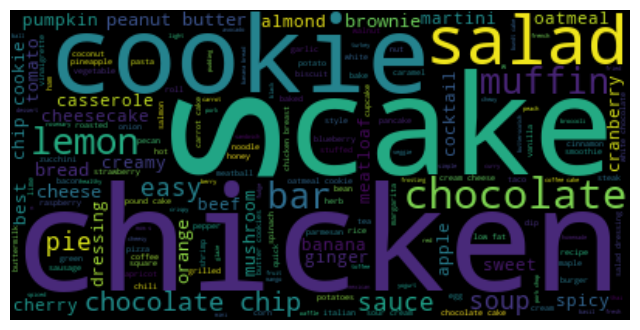

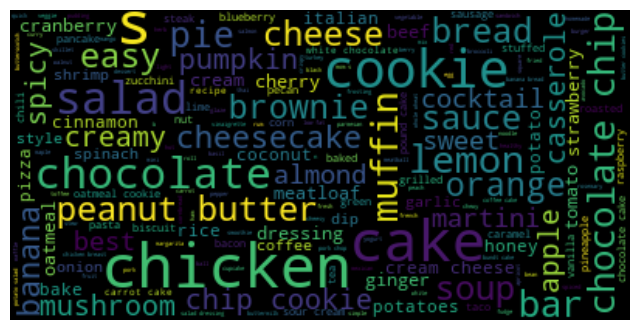

In [41]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(recipes_names_string)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(recipes_names_string)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Representing recipe names
rubric={points}

The next step is creating a representation of recipe names. 

**Your tasks:**

1. Similar to Exercise 1, create sentence embedding representation of recipe names (`name` column in `recipes_df`).  For the rest of the homework, we'll stick to the sentence embedding representation of recipe names.


> You might have to convert the recipe names to a list (`recipes_df["name"].tolist()`) for the embedder to work
> *If you create a dataframe with sentence embedding representation, set the index to `recipes_df.index` so that the indices match with the indices of the sample we are working with.*  
> **This might take a while to run.**


<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 3

In [42]:
embeddings = embedder.encode(recipes_df["name"].tolist())
embeddings_df = pd.DataFrame(embeddings, index=recipes_df.index)
embeddings

array([[-0.33347425,  0.22786464, -0.30733892, ...,  0.19773833,
        -0.38642117, -0.002184  ],
       [-0.02452281,  0.24622291, -0.05570877, ...,  0.18630971,
        -0.27850008,  0.02857978],
       [-0.02656151,  0.19467108,  0.03810177, ...,  0.1332103 ,
        -0.1223441 , -0.10986306],
       ...,
       [ 0.01614885, -0.0530352 , -0.03509734, ..., -0.43600035,
        -0.05390983,  0.01242335],
       [ 0.02665929,  0.20248263,  0.344634  , ..., -0.24086173,
         0.23683017,  0.17712276],
       [-0.03194692, -0.2581896 , -0.0797656 , ..., -0.56938267,
        -0.21914792, -0.0335256 ]], dtype=float32)

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Clustering recipe names
<hr>

In this exercise you'll cluster recipe names with some of the clustering algorithms we have seen in class. This will also involve making some attempts to pick reasonable hyperparameter values for each clustering method based on the quality of the resulting clusters. For example, for KMeans, you need to specify the number of clusters in advance, which is often challenging on real-world datasets. For DBSCAN, you need to pick appropriate `eps` and `min_samples`. For hierarchical clustering, you need to pick a suitable linkage criterion, distance metric, and prune the tree so that it's possible to visualize and interpret it. 

Here are some methods which may help you with picking reasonable values for the hyperparameters. 
- Visualize the Elbow plot (KMeans). 
- Visualize Silhouette plots. 
- Visualize resulting clusters using `plot_umap_clusters` function from Exercise 1. 
- Sample some recipes from each cluster, manually inspect whether there are coherent semantic themes. (For this, you may use the function `print_clusters` given below.) 
        
> You may use the [`yellowbrick`](https://www.scikit-yb.org/en/latest/) package for visualizing the Elbow plot and the Silhouette plots.

**Note that the process of picking reasonable hyperparameter values will be exploratory, iterative, and will involve manual inspection and judgment, as there is no ground truth to verify how well the model is doing. In your solutions, please do not include everything you try. Only present the results of the most informative trials. Add a narrative to your answer so that it's easy for the grader to follow your choices and reasoning.** 

In [43]:
def print_clusters(recipes_df, cluster_labels, n_recipes=10, replace=False, random_state=None):
    """
    Given recipes_df containing recipe names and cluster assignment (labels), 
    sample and print n_recipes recipes per cluster. 

    Parameters
    -----------
    recipe_df : pandas dataframe 
        recipes dataframe containing recipe names in the "name" column
    cluster_labels : ndarray or a list
        cluster labels for each row in recipes_df 
    n_recipes : int
        number of examples to sample from each cluster
    replace: bool
        replace flag to pass to the sampling of recipe names

    Returns
    -----------
    None
    """    
    
    grouped = (
        pd.DataFrame(
            {
                "name": recipes_df["name"],
                "cluster_label": cluster_labels,
            }
        )
        .sort_values("cluster_label")
        .groupby("cluster_label")    
    )
    
    for name, group in grouped:
        print(f"Cluster {name}")        
        print(("----------").format(""))        
        print("\n".join(group.sample(n_recipes, random_state=random_state)['name'].tolist()))
        print("\n\n")

<br><br>

<!-- BEGIN QUESTION -->

### 3.1 K-Means
rubric={points}

**Your tasks:**

1. Cluster recipe titles using KMeans. Make some attempts to determine the optimal number of clusters. 
2. Pick one or two best models and justify your choice. 

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._


Use elbow to determine the number of clusters

In [44]:
def plot_elbow(w, h, inertia_values):
    plt.figure(figsize=(w, h))
    plt.axvline(x=7, linestyle="-.", c="black")
    plt.plot(range(1, 25), inertia_values, "-o")
    ax = plt.gca()
    ax.tick_params("both", labelsize=(w + h))
    ax.set_xlabel("K", fontsize=w+h)
    ax.set_ylabel("Inertia", fontsize=w+h)

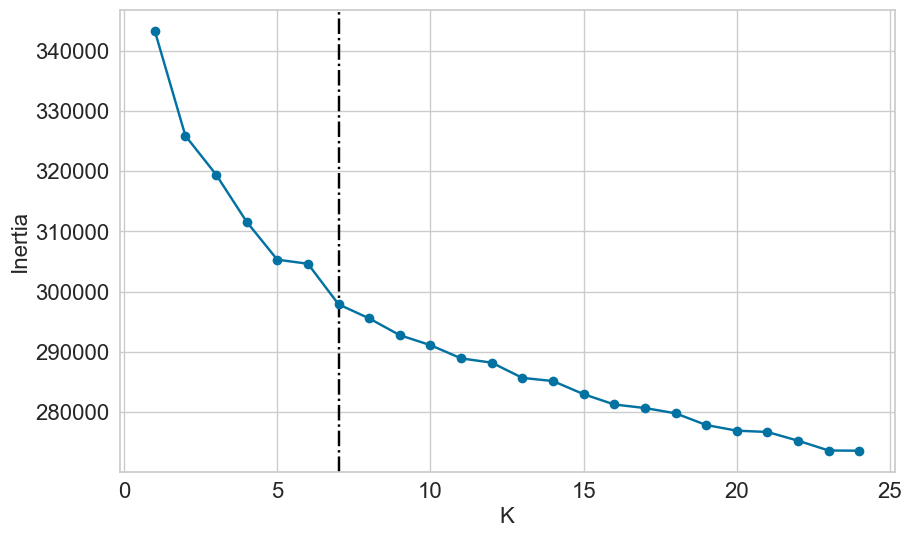

In [45]:
inertia_values = list()
for k in range(1, 25):
    inertia_values.append(KMeans(n_clusters=k, n_init='auto').fit(embeddings).inertia_)
plot_elbow(10, 6, inertia_values)

The plot above presents no clear 'elbow' point, and the inertia value decreases gradually as k increases. However, the inertia value drops quickly as k increases from 0 to 3, and the inertia value reduces half as k increase to 6. It is hard to tell weather 3 or 6 clusters performs better in k-means clustering just by looking at the plot, therefor I will train k-means models on both k values and evaluate the results.

#### Model1: n_clusters = 3

In [46]:
cluster_count_1 = 3
kmeans_embeddings = KMeans(n_clusters=cluster_count_1, random_state=42,n_init = 'auto')
kmeans_embeddings.fit(embeddings_df)
kmeans_embeddings_labels = kmeans_embeddings.labels_
# np.unique(kmeans_embeddings_labels)
cluster0 = np.count_nonzero(kmeans_embeddings_labels == 0)
cluster1 = np.count_nonzero(kmeans_embeddings_labels == 1)
cluster2 = np.count_nonzero(kmeans_embeddings_labels == 2)
print("cluster0: ", cluster0, " cluster1: ", cluster1, " cluster2: ", cluster2)

cluster0:  2005  cluster1:  3576  cluster2:  3519


**Silhouette plot**

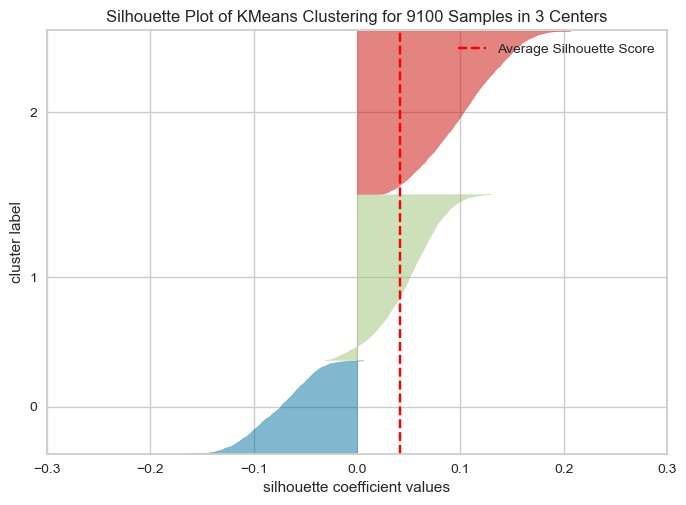

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 9100 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
visualizer = SilhouetteVisualizer(kmeans_embeddings, colors="yellowbrick")
visualizer.fit(embeddings_df)  # Fit the data to the visualizer
visualizer.show()

As evidenced by the silhouette scores, the clustering resutl is not optimal. 
- There are three clusters in total with relatively even thickness, meaning data are relatively evenly distributed into three clusters. To be more precise, examples in the red-colored cluster > green-colored cluster > blue-colored cluster. 

- All examples in the blue-colored cluster is smaller than 0; The red and green clusters have a very small sihouette socre of 0.2 and o.1. This indicates that there are many overlaps in each cluster. 

- All three silhouette socres have very deep dropoffs as shown in the graph, meaning that the clustering result is poor. 

**umap plot**

Looking at the umap plot, cluster 1 and cluster are mainly concentrated on the left and right in the coordinate, while the cluster0 is spread out. There seems to be some overlaps in each clusters.

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



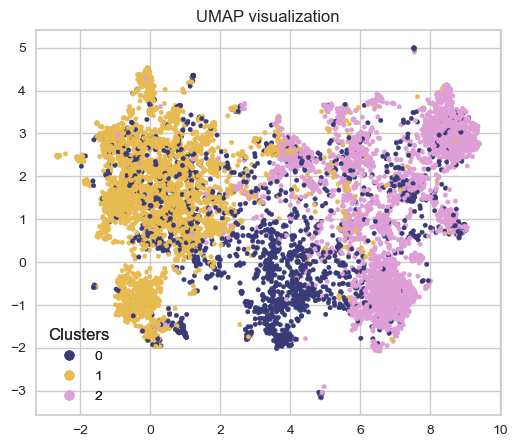

In [48]:
plot_umap_clusters(
    embeddings,
    kmeans_embeddings_labels,
    raw_sents=embeddings,
    show_labels=False,
    size=10,
    n_neighbors=15,
    title="UMAP visualization",
    ignore_noise=False,
)

**Analyze the cluster samples**

However, looking at the sampling examples in each clusters, the semantic meanings are largely consistent but with many noises. Cluster 0 predominantly contains beverage and cocktail recipes. Cluster 1 consists of savory recipes, including main courses, salad and soup. Cluster2 is mainly about dessert and baked goods. Looking at the semantic meanings, the k-means clustering result seems to be ok. 

In [49]:
print_clusters(recipes_df, kmeans_embeddings_labels, n_recipes=30, replace=False, random_state=None)

Cluster 0
----------
melting life savers cocktail
branston pickle balsamic vinaigrette
sweet thing
licorice stick  shot
vellini
courage cocktail
frostbite
caramel macchiato martini
rooibos juice
vanilla lemonade
slow roll
woo woo cocktail
blondie squares
herbal iced tea
spiced citrus coffee
moscow mule
haleakala martini
tuna goop
easy asian coleslaw
pineapple mint iced tea
iced english rose tea
zucchini mexicana
pink lady squares
apple strips
candy bar squares
buttery finger
fruity   spicy rum tea
blue lush
spiced up yuletide coffee
spice and herb marinade



Cluster 1
----------
weight watchers garlic herb bread
garden  sloppy joes   cooking light
leftover magic beef
corn and couscous salad
lady and sons  chicken in wine sauce
tapas  bacon wrapped dates and sweet red bell pepper sauce
chicken fried pork with milk gravy
yankee chowder
layered spinach lettuce salad
hungry girl kung pow chicken
cheesy herbed garlic bread
fried chicken with chicken gravy
keith moore s king ranch chicken
t

In [50]:
k_means_clustering = ["beverage and cocktail", "savory recipes", "dessert and baked goods"]

#### model2: n_clusters = 6

In [51]:
cluster_count_2 = 6
kmeans_embeddings_2 = KMeans(n_clusters=cluster_count_2, random_state=42,n_init = 'auto')
kmeans_embeddings_2.fit(embeddings_df)
kmeans_embeddings_labels_2 = kmeans_embeddings_2.labels_
kmeans_embeddings_labels_2

array([2, 2, 4, ..., 3, 0, 3], dtype=int32)

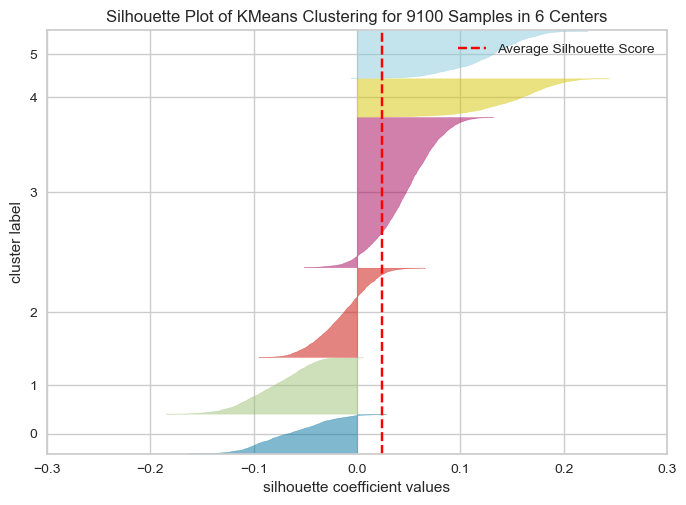

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 9100 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
visualizer = SilhouetteVisualizer(kmeans_embeddings_2, colors="yellowbrick")
visualizer.fit(embeddings_df)  # Fit the data to the visualizer
visualizer.show()

Looking at the sihouette plot, there is no improvement in the silhouette coefficient values after increasing the number of clusters from 3 to 6, instead, the silhouette socre dropoffs have become deeper than previous model with n_clusters = 3. Therefore, I would pick model 1 with n_cluster=3 as the best model for k-means clustering.

<!-- BEGIN QUESTION -->

### 3.2 DBSCAN
rubric={points}

**Your tasks:**

1. Cluster recipe names using `DBSCAN` with `metric="cosine"`. Make some attempts to tune the  hyperparameters `eps` and `min_samples`. 

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [53]:
# tuning eps 
for eps in np.arange(0.1, 1, 0.1):
    print("\neps={}".format(eps))
    dbscan = DBSCAN(metric='cosine', eps=eps, min_samples=300)
    labels = dbscan.fit_predict(embeddings)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=0.1
Number of clusters: 1
Cluster sizes: [9100]

eps=0.2
Number of clusters: 1
Cluster sizes: [9100]

eps=0.30000000000000004
Number of clusters: 2
Cluster sizes: [7960 1140]

eps=0.4
Number of clusters: 3
Cluster sizes: [5240 3572  288]

eps=0.5
Number of clusters: 2
Cluster sizes: [1179 7921]

eps=0.6000000000000001
Number of clusters: 2
Cluster sizes: [ 180 8920]

eps=0.7000000000000001
Number of clusters: 2
Cluster sizes: [   3 9097]

eps=0.8
Number of clusters: 1
Cluster sizes: [   0 9100]

eps=0.9
Number of clusters: 1
Cluster sizes: [   0 9100]


In [54]:
# tuning min_samples
for min_samples in np.arange(100, 500, 50):
    print("\nmin_samples={}".format(min_samples))
    dbscan = DBSCAN(metric='cosine', eps=0.4, min_samples=min_samples)
    labels = dbscan.fit_predict(embeddings)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


min_samples=100
Number of clusters: 2
Cluster sizes: [3174 5926]

min_samples=150
Number of clusters: 2
Cluster sizes: [3655 5445]

min_samples=200
Number of clusters: 2
Cluster sizes: [4097 5003]

min_samples=250
Number of clusters: 2
Cluster sizes: [4631 4469]

min_samples=300
Number of clusters: 3
Cluster sizes: [5240 3572  288]

min_samples=350
Number of clusters: 2
Cluster sizes: [5606 3494]

min_samples=400
Number of clusters: 2
Cluster sizes: [5699 3401]

min_samples=450
Number of clusters: 2
Cluster sizes: [5781 3319]


From the result 

In [55]:
eps=0.4
min_samples=300
dbscan_embeddings = DBSCAN(metric='cosine',eps=eps, min_samples=min_samples)
dbscan_embeddings.fit(embeddings)
dbscan_embeddings_labels = dbscan_embeddings.labels_
np.unique(dbscan_embeddings.labels_)

array([-1,  0,  1])

In [56]:
eps=0.4
min_samples=300
dbscan_embeddings = DBSCAN(metric='cosine',eps=eps, min_samples=min_samples)
dbscan_embeddings.fit(embeddings)
dbscan_embeddings_labels = dbscan_embeddings.labels_
np.unique(dbscan_embeddings.labels_)

array([-1,  0,  1])

In [57]:
print_clusters(recipes_df, dbscan_embeddings_labels, n_recipes=10, replace=True, random_state=None)

Cluster -1
----------
asian chickpea and coriander dip
scotch stew
roast pork tenderloin with pears and dried apricots
grapefruit margarita martini
police   thieves from the one bottle cocktail
bailey s creme brulee
bailey s brownies
oil based pie crust
limey apricot rum cooler
albacore tuna with jalapeno bacon cream sauce



Cluster 0
----------
praline crunch cups
my mother s banana bread
nearly no fat fudge brownies
applesauce raisin cake
hawaiian pineapple cake
fuzzy navel  peach cream  pie
sour cream yeast rolls  taste of home
mini chocolate lava cakes
dizzi s chocolate candy   sugar free
carrot cake supreme



Cluster 1
----------
family favorite salad dressing
spinach mushroom salad
green jacket salad dressing
lime tahini salad dressing
grilled chicken caesar salad
ramen cabbage salad
country style greek salad
mom s salad dressing
butter bean salad
shredded romaine salad





In [58]:
cluster_1 = np.count_nonzero(dbscan_embeddings_labels == -1)
cluster0 = np.count_nonzero(dbscan_embeddings_labels == 0)
cluster1 = np.count_nonzero(dbscan_embeddings_labels == 1)
print("cluster-1: ", cluster_1, " cluster0: ", cluster0, " cluster1: ", cluster1)

cluster-1:  5240  cluster0:  3572  cluster1:  288


**Silhouette plot**

In [59]:
n_clusters = len(set(dbscan_embeddings.labels_))
dbscan_embeddings.n_clusters = n_clusters
dbscan_embeddings.predict = lambda x: dbscan_embeddings.labels_

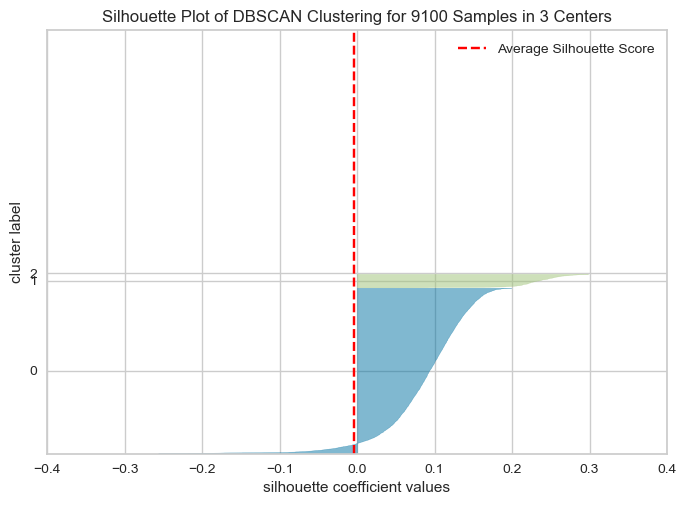

<Axes: title={'center': 'Silhouette Plot of DBSCAN Clustering for 9100 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
visualizer = SilhouetteVisualizer(dbscan_embeddings, colors="yellowbrick")
visualizer.fit(embeddings_df)  # Fit the data to the visualizer
visualizer.show()

From the silhouette plot of DBSCAN clustering, the silhouette values for each cluster are between -0.1 and 0.3, with deep the dropoffs. Although DBSCAN result is lightly better than k-means clustering, but the performance is still not satisfying. 

**umap plot**

The umap plot of dbscan clustering result presents a different pattern compared with the k-means clustering. There are two dominated clusters and a insignificant cluster with very small number of examples in the bottom-left corner.

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



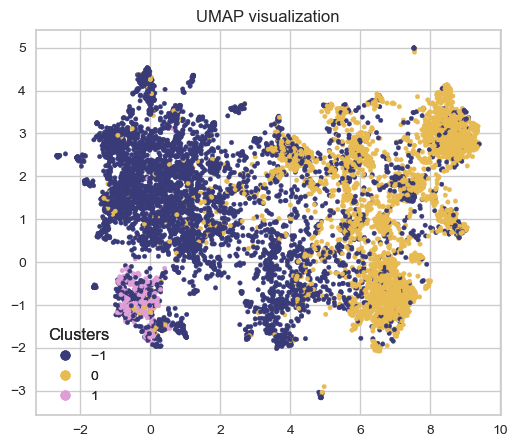

In [61]:
plot_umap_clusters(
    embeddings,
    dbscan_embeddings.labels_,
    raw_sents=embeddings,
    show_labels=False,
    size=10,
    n_neighbors=15,
    title="UMAP visualization",
    ignore_noise=False,
)

**Analyze the cluster samples**

Looking at the samples in each cluster, cluster 1 has consistent values of salad, cluster 0 consists of dessert and baked goods, while cluster -1 is relatively more diverse that can't fit into a single specific category. Compare with k-means clustering, dbscan doesn't have improvement in performance, instead, the clustering result seems to be worse than k-meanings clustering.

In [62]:
print_clusters(recipes_df, dbscan_embeddings_labels, n_recipes=200, replace=True, random_state=None)

Cluster -1
----------
asian basil pesto
tom s coffee cream martini
parmesan white bean dip
kotopita  chicken phyllo pie
salmon with bok choy and mushrooms
tasty chicken   fennel soup in a crock pot
the ultimate carob cake
apple harvest muffins
potato zucchini onion ring kugel
pea soup with ham
crepe batter a la julia child
ginger plum chicken stir fry
tiramisu martini
southern style baked beans
green bay chili
candy cane lane martini
mexicana rice
chicken  basil and sun dried tomato pasta
balsamic marinade
what she s having
bacardi root beer float
chop soui
p  f  chang s poolside
blueberry and mascarpone turnovers
lamb and artichoke stew  greek
rosemary balsamic reduction
chicken and barley soup
turkey taco skillet
8th birthday
it s a keeper casserole
easy creamy ranch chicken potato soup  rsc
the best chicken divan ever
lactose free  indian curry
spicy gingerman cocktail
police   thieves from the one bottle cocktail
almond roca gourmet popcorn
victoryred s pork chop marinade for the g

<!-- END QUESTION -->

<br><br>

In [63]:
dbscan_clustering = ["salad", "dessert and baked goods", "diverse recipes"]

<!-- BEGIN QUESTION -->

### 3.3 Hierarchical clustering
rubric={points}

**Your tasks:**

1. Try hierarchical clustering with `metric="cosine"` on this problem. Show a dendrogram by using a suitable truncation method. 
2. Create flat clusters by cutting the tree at the appropriate level. 

> *Note: Try orientation="left" of `dendrogram` for better readability of the dendrogram.*

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 6

#### choosing the best suitable truncation method

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75]],
 'dcoord': [[0.0, 9.782817970066922, 9.782817970066922, 0.0],
  [0.0, 9.80667067220886, 9.80667067220886, 9.782817970066922],
  [0.0, 9.863082485739456, 9.863082485739456, 9.80667067220886],
  [0.0, 10.111491102241574, 10.111491102241574, 9.863082485739456]],
 'ivl': ['8736', '1412', '2181', '(2)', '(9095)'],
 'leaves': [8736, 1412, 2181, 17756, 18194],
 'color_list': ['C0', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C0', 'C0', 'C0']}

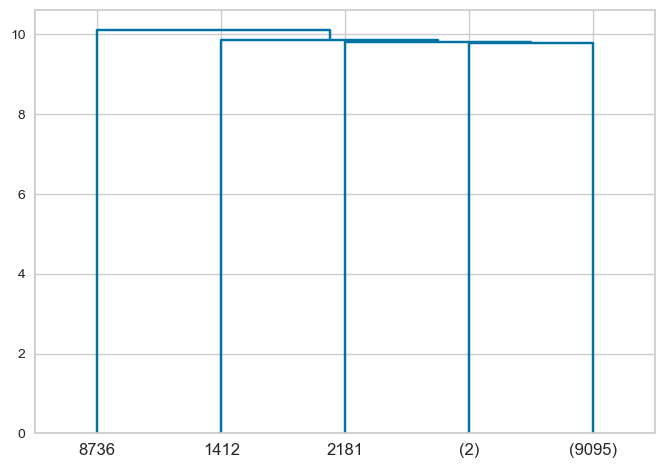

In [64]:
# creating dendrogram with single linkage, truncate with p = 3 levels
linkage_array_single = single(embeddings)
dendrogram(linkage_array_single, p=3, truncate_mode="level")

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [90.0, 90.0, 130.0, 130.0],
  [31.25, 31.25, 110.0, 110.0]],
 'dcoord': [[0.0, 11.037930965880905, 11.037930965880905, 0.0],
  [0.0, 11.705227071273384, 11.705227071273384, 11.037930965880905],
  [0.0, 9.40577138073415, 9.40577138073415, 0.0],
  [0.0, 12.500060863955682, 12.500060863955682, 0.0],
  [9.40577138073415,
   13.097458447193771,
   13.097458447193771,
   12.500060863955682],
  [11.705227071273384,
   13.716146122623119,
   13.716146122623119,
   13.097458447193771],
  [0.0, 13.701581793821315, 13.701581793821315, 0.0],
  [0.0, 13.792603278676319, 13.792603278676319, 0.0],
  [13.701581793821315,
   14.277939249760585,
  

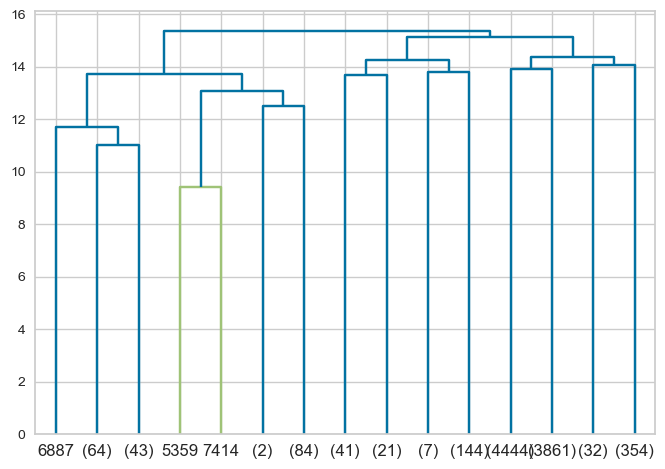

In [65]:
# creating dendrogram with complete linkage, truncate with p = 3 levels
linkage_array_complete = complete(embeddings)
dendrogram(linkage_array_complete, p=3, truncate_mode="level")

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [90.0, 90.0, 130.0, 130.0],
  [31.25, 31.25, 110.0, 110.0]],
 'dcoord': [[0.0, 11.037930965880905, 11.037930965880905, 0.0],
  [0.0, 11.705227071273384, 11.705227071273384, 11.037930965880905],
  [0.0, 9.40577138073415, 9.40577138073415, 0.0],
  [0.0, 12.500060863955682, 12.500060863955682, 0.0],
  [9.40577138073415,
   13.097458447193771,
   13.097458447193771,
   12.500060863955682],
  [11.705227071273384,
   13.716146122623119,
   13.716146122623119,
   13.097458447193771],
  [0.0, 13.701581793821315, 13.701581793821315, 0.0],
  [0.0, 13.792603278676319, 13.792603278676319, 0.0],
  [13.701581793821315,
   14.277939249760585,
  

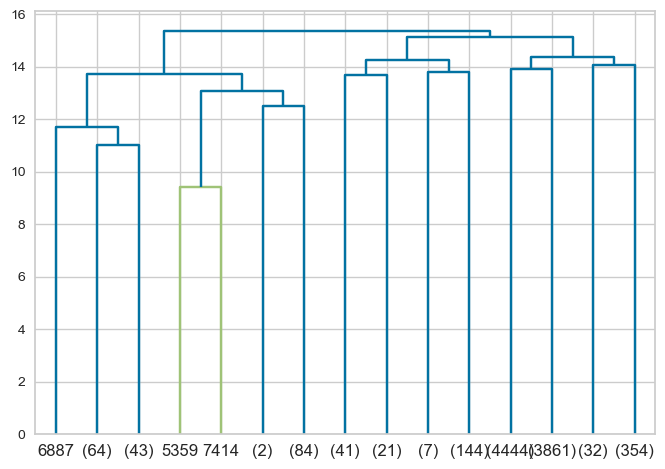

In [66]:
# creating dendrogram with ward linkage, truncate with p = 3 levels
linkage_array_ward = complete(embeddings)
dendrogram(linkage_array_ward, p=3, truncate_mode="level")

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [22.5, 22.5, 52.5, 52.5],
  [5.0, 5.0, 37.5, 37.5]],
 'dcoord': [[0.0, 7.724846212078611, 7.724846212078611, 0.0],
  [0.0, 11.106018320194782, 11.106018320194782, 7.724846212078611],
  [0.0, 11.968887116657957, 11.968887116657957, 0.0],
  [0.0, 12.053373122353559, 12.053373122353559, 11.968887116657957],
  [11.106018320194782,
   12.095111961179688,
   12.095111961179688,
   12.053373122353559],
  [0.0, 12.111800991434091, 12.111800991434091, 12.095111961179688]],
 'ivl': ['6887', '6749', '4253', '4254', '7365', '8176', '(9094)'],
 'leaves': [6887, 6749, 4253, 4254, 7365, 8176, 18194],
 'color_list': ['C1', 'C0', 'C0', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1', 'C0', 'C0', 'C0']}

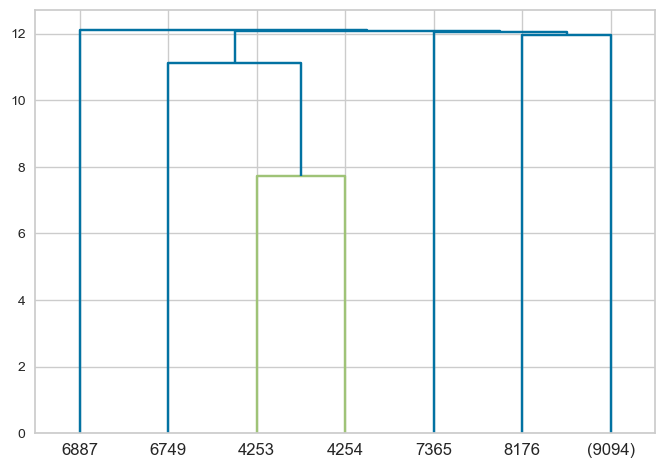

In [67]:
# creating dendrogram with average linkage, truncate with p = 3 levels
linkage_array_average = average(embeddings)
dendrogram(linkage_array_average, p=3, truncate_mode="level")

After performing the truncation on the hierachical clustering  with single, complete, average and ward linkage, it is clear to see that the data set can be clustered into 3 groups, complete linkage and ward linkage are both suitable to determine the distance between clusters.

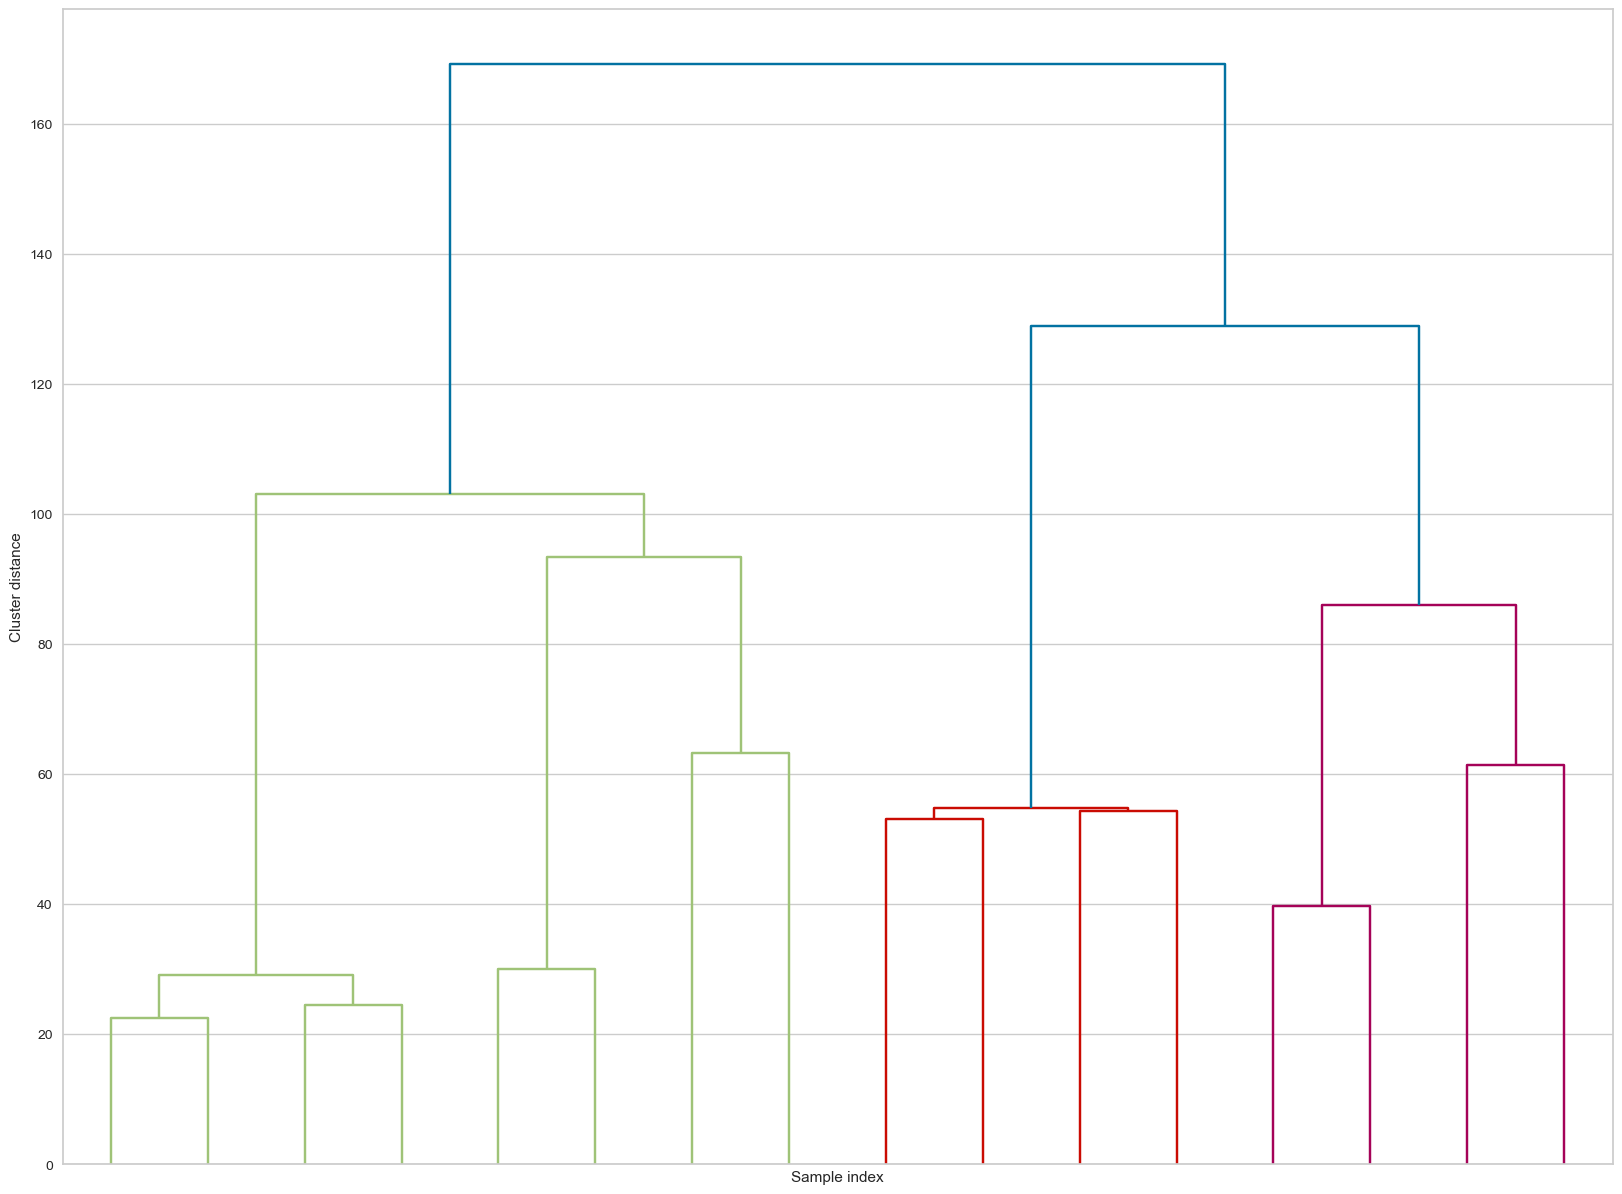

In [68]:
plt.figure(figsize=(20, 15))
linkage_array = ward(embeddings)
dendrogram(linkage_array, p=3, truncate_mode="level", no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance");

In [69]:
hier_labels = fcluster(linkage_array, 3, criterion="maxclust") 
hier_labels
np.unique(hier_labels)

array([1, 2, 3], dtype=int32)

**Umap plot**

The umap plot of hierarchical clustering presents an identical pattern with the k-means clustering result, with three clusters mainly concentrated on the left, middle, and right of the coordinate. However, there seems to be more overlaps among three clusters compared with the k-means clustering result. 

/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



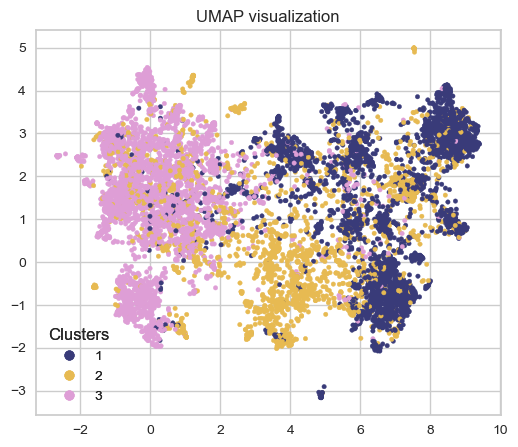

In [70]:
plot_umap_clusters(
    embeddings,
    hier_labels,
    raw_sents=embeddings,
    show_labels=False,
    size=10,
    n_neighbors=15,
    title="UMAP visualization",
    ignore_noise=False,
)

**Analyze the clustering samples**

Looking at the semantic meanings in clustering result, cluster 1 is mainly themed as sweet dessert, cluster 2 is mainly themed as beverages and savory , nd cluster 3 is mainly about Savory Main Courses. 

In [71]:
hier_clustering = ["dessert and baked goods", "beverage and cocktail", "savory dishes"]

In [72]:
print_clusters(recipes_df, hier_labels, n_recipes=100, replace=True, random_state=None)

Cluster 1
----------
iced pumpkin cookies
babycakes
kennedy family brownies
peanut butter finger bars
chocolate dipped macadamia shortbread cookies
blueberry  raspberry and blackberry cheesecake
bread machine conchas
better than copycat buttermilk pancakes
mixed nut pie
grapefruit cosmo
cranberry macadamia crunch bars
oatmeal chocolate chip pizza cookie
heloises olive nut sandwich spread
secret weapon toddler muffins
beef  n  cheese french bread
mango banana smoothie
lemon almond tea bread
cranberry pecan sandwich bread  for abm
lil s banana cake with char s chocolate frosting
lemon amaretto bundt cake
pig picking cake
blueberry crumb cake
citron cherry cake
yogurt marmalade cake
my version of caramel  salted cocoa
tender sour cream sweet dough
great grains pancakes
peanut crunch cake
pudding cookies
kathleen s irish potato pancakes
cocoa almond coco cake
multigrain pancakes
gift of the magi bread
penzeys banana bread
french toast strata  sherry and jim rougeux
cake formula
double berr

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.4 Manual interpretation of clusters
rubric={points}

**Your tasks:**

1. Label the topics/themes you see in the clusters created by different clustering methods.  
2. Do you see a common theme across clusters created by different clustering methods? Do you see any differences between the clusters created by different clustering methods? 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [73]:
results= {}
results["k_means_clustering"] = k_means_clustering
results['dbscan_clustering'] = dbscan_clustering
results["hier_clustering"] = hier_clustering
pd.DataFrame(results)

,k_means_clustering,dbscan_clustering,hier_clustering
0,beverage and cocktail,salad,dessert and baked goods
1,savory recipes,dessert and baked goods,beverage and cocktail
2,dessert and baked goods,diverse recipes,savory dishes


- k_means and hierarchical have the same clustering themes, namely "beverage and cocktail", "dessert and bake goods", and "savory recipes".
- "dessert and baked goods" is a common theme among all clustering results. 
- dbscan has the most different result than other methods, it specially identifies salad as a group, and mix everything else in a diverse cluster. This could be a result of non-optimal eps and min-sample value settings.

<!-- END QUESTION -->

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

![](img/eva-well-done.png)